In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from ipywidgets import interact, interactive, fixed

In [2]:
#blow up an image by a factor of x
def blowUp(image,x):
    w,h = image.shape
    newimage = np.zeros((w*x,h*x))
    for row in range(h):
        for col in range(w):
            px = image[row,col]
            for i in range(col*x,col*x+x):
                for j in range(row*x,row*x+x):
                    newimage[j,i] = px
    return newimage


## Set the fn variable to the filename of either the training or test dataset

In [3]:
#training data
#fn = 'data/ocr/optdigits.tra'

#testing data
fn = 'data/ocr/optdigits.tes'

header="x11,x12,x13,x14,x15,x16,x17,x18,x21,x22,x23,x24,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x41,x42,x43,x44,x45,x46,x47,x48,x51,x52,x53,x54,x55,x56,x57,x58,x61,x62,x63,x64,x65,x66,x67,x68,x71,x72,x73,x74,x75,x76,x77,x78,x81,x82,x83,x84,x85,x86,x87,x88,digit".split(",")

df = pd.read_csv(fn, header=None)
df.columns = header
df.head()

,x11,x12,x13,x14,x15,x16,x17,x18,x21,x22,...,x78,x81,x82,x83,x84,x85,x86,x87,x88,digit
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [4]:
y = df.digit.copy().values
X = df.drop("digit", axis=1).values
X.shape, y.shape

((1797, 64), (1797,))

In [5]:
X = X.reshape((-1, 8,8))
X.shape

(1797, 8, 8)

## After running the cell below, you can move the slider to visualize the various instances of the dataset, change factor slider to increase the sharpness of the image

Instance 1:	['0', '0', '5', '13', '9', '1', '0', '0', '0', '0', '13', '15', '10', '15', '5', '0', '0', '3', '15', '2', '0', '11', '8', '0', '0', '4', '12', '0', '0', '8', '8', '0', '0', '5', '8', '0', '0', '9', '8', '0', '0', '4', '11', '0', '1', '12', '7', '0', '0', '2', '14', '5', '10', '12', '0', '0', '0', '0', '6', '13', '10', '0', '0', '0', '0']


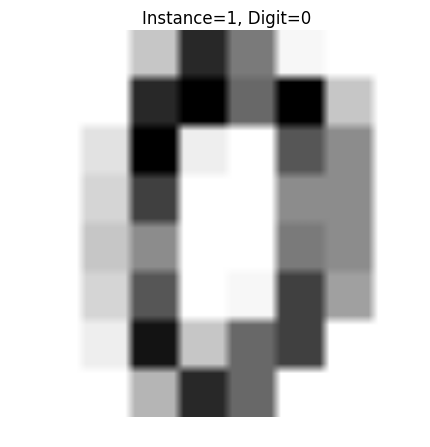

In [6]:
@interact(X=fixed(X), y=fixed(y), idx=(0,X.shape[0]), factor=(1,50))
def show_item(X, y, idx=0, factor=5):
    x = X[idx]
    print("Instance %s:\t[%s]" % (
            idx+1, ", ".join("'%s'" % str(k) for k in 
                list(x.flatten()) + [y[idx]])))
    x = (((x-16)/16.0)*255).astype("int")
    x = blowUp(x, factor)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(x, cmap="Greys")
    ax.set_title("Instance=%s, Digit=%s" % (idx+1, y[idx]))
    plt.axis('off')